# individual plane
## loading data

In [1]:
library(tidyverse)  
library(class)       
library(rsample)
library(purrr) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:

players<- read_csv("data/players.csv")
    
head(players)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


- *number of observation:196*
- *number of variable:7*
- *experience:Player experience level (Pro, Veteran, Regular, Amateur)*
- *subscribe:Whether the player subscribed the game newsletter*
- *hashesemail:useless to my prediction process,thus I decided to delete in the data table.*

In [3]:
nrow(players)

[1] 196

In [15]:

 players_1 <- read_csv("data/players.csv") |>
  select(-hashedEmail) |>
  mutate(
    subscribe = as.numeric(subscribe),
    gender = ifelse(gender == "Male", 1, 0),
    experience = case_when(
      experience == "Pro" ~ 3,
      experience == "Veteran" ~ 2,
      experience == "Regular" ~ 1,
      experience == "Amateur" ~ 0,
      TRUE ~ NA_real_)) |>
  drop_na() 
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,played_hours,name,gender,Age
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
3,1,30.3,Morgan,1,9
2,1,3.8,Christian,1,17
2,0,0.0,Blake,1,17
0,1,0.7,Flora,0,21
1,1,0.1,Kylie,1,21
0,1,0.0,Adrian,0,17


In [4]:
summarize(players,max_hr = max(played_hours),min_hr = min(played_hours),mean_hr = mean(played_hours))

max_hr,min_hr,mean_hr
<dbl>,<dbl>,<dbl>
223.1,0,5.845918


In [5]:
summarise(players, 
          max_age = max(Age, na.rm = TRUE), 
          min_age = min(Age, na.rm = TRUE), 
          mean_age = mean(Age, na.rm = TRUE))



max_age,min_age,mean_age
<dbl>,<dbl>,<dbl>
50,8,20.52062


By calculating *max, mean, and min*,we can gain valuable spots for player behavior and subscription
- 1.Identifying extreme player behavior and analyze it.
- 2.The average value provides a example of the typical player.

## Question to answer
I will answer **Question 1**:  
*"What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"*.
To be more specifically:
- **Prediction Task**: Using **K-Nearest Neighbors classification**, I will predict whether a player will subscribes (`subscribe`) based on there:
  - *Experience Level (`experience`)*
  - *Playtime (`played_hours`)*
  - *Age (`Age`)*
  - *Gender (`gender`)*
    
- **Feature Differences**:

- I will analyze how these features vary among player types (experience levels) simultaneously.

- Compare how factors such as experience level, playtime, and ageinfluence subscription decisions.

  To conduct this analysis, I will use **data wrangling**, **visualization**, and **K-Nearest Neighbors (KNN) classification** in R.
*Data Wrangling*
This will be using the mutate function to transform categorical variables, and drop_na to remove incomplete rows.

*Visualiazation*
To understand the data better, I will visualize key relationships using ggplot 

*K-Nearest Neighbors*
To standardize data, I will use scale, and creating training and testing sets


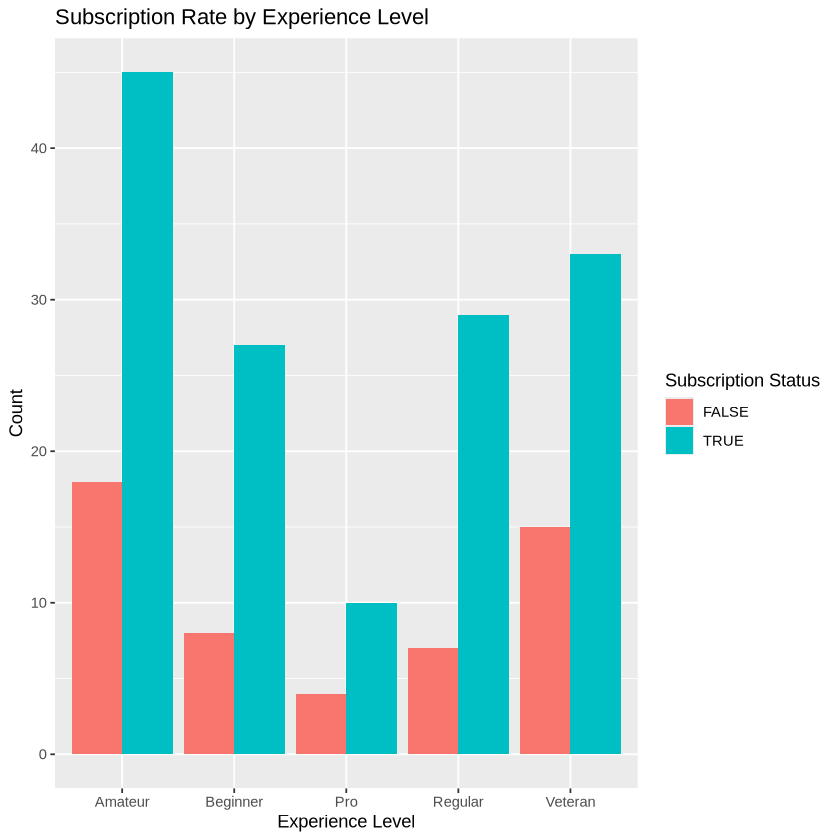

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


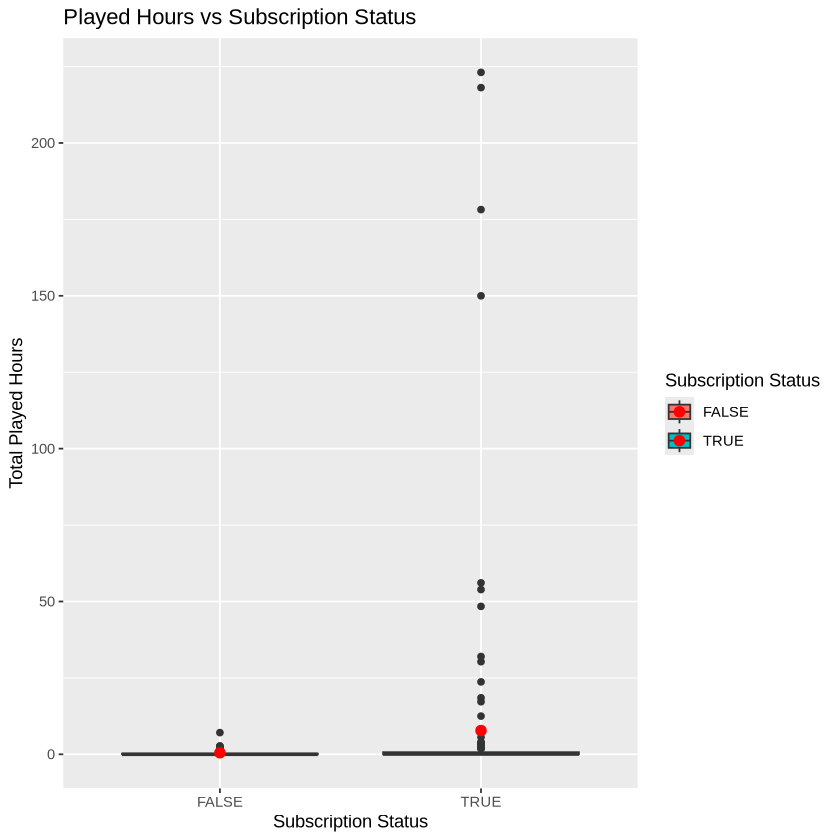

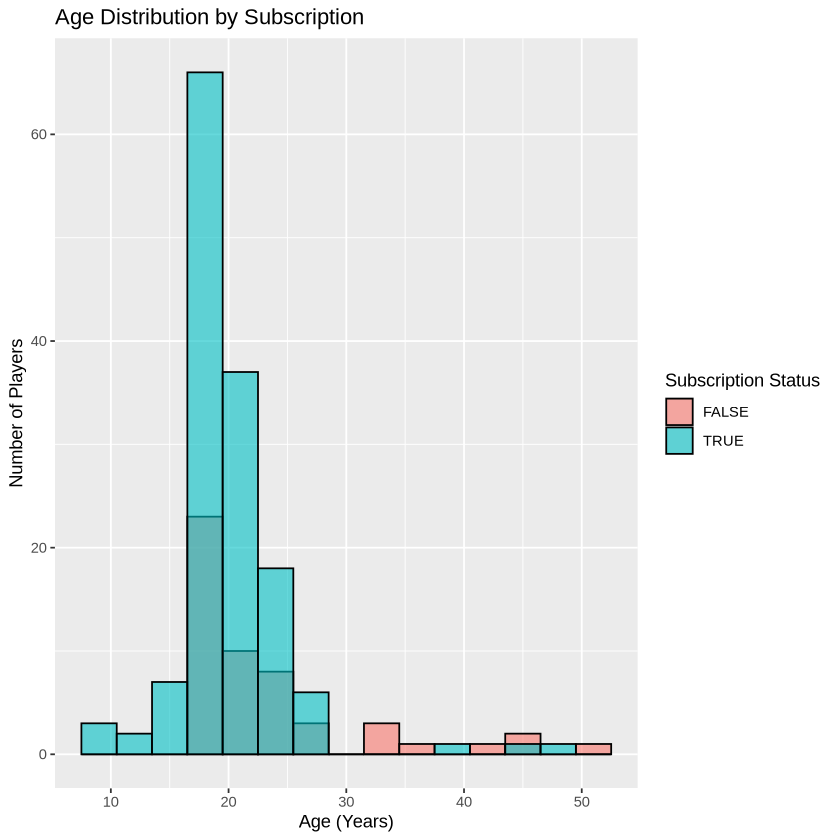

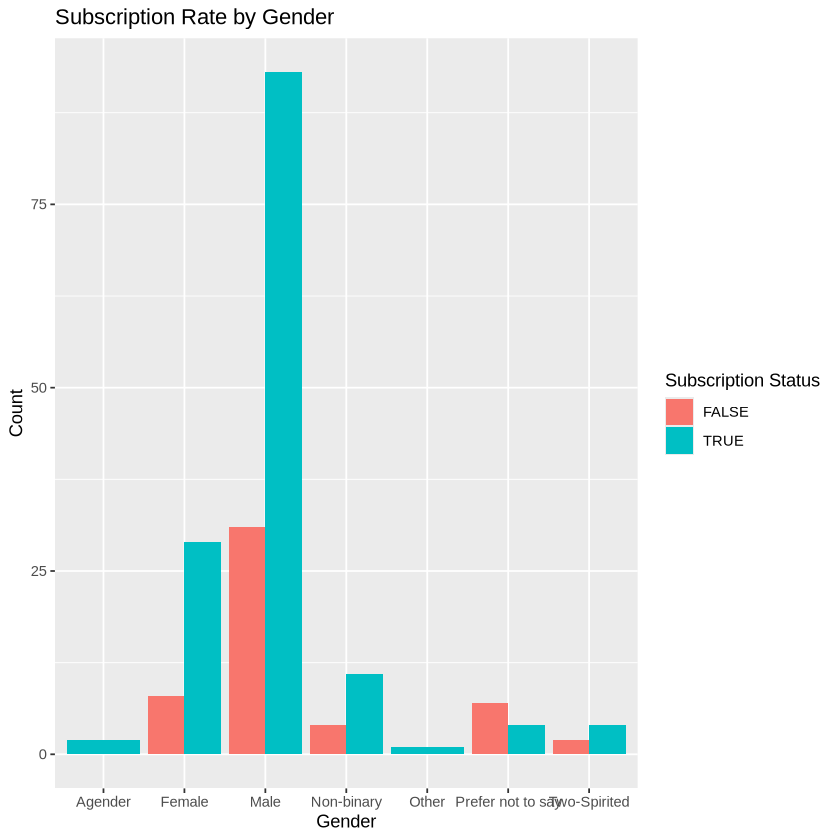

In [32]:



experience_plot <- players |>
  ggplot(aes(x = experience, fill = factor(subscribe))) +
  geom_bar(position = "dodge") +
  labs(
    title = "Subscription Rate by Experience Level",
    x = "Experience Level",
    y = "Count",
    fill = "Subscription Status" ) 
  played_hours_plot <- players |>
  ggplot(aes(x = factor(subscribe), y = played_hours, fill = factor(subscribe))) +
  geom_boxplot() +
  stat_summary(fun = mean, geom = "point", shape = 20, size = 4, color = "red") +  # 标注均值
  labs(
    title = "Played Hours vs Subscription Status",
    x = "Subscription Status",
    y = "Total Played Hours",
    fill = "Subscription Status") 


age_plot <- players |>
  ggplot(aes(x = Age, fill = factor(subscribe))) +
  geom_histogram(bins = 15, alpha = 0.6, position = "identity", color = "black") +
  labs(
    title = "Age Distribution by Subscription",
    x = "Age (Years)",
    y = "Number of Players",
    fill = "Subscription Status") 


gender_plot <- players |>
  ggplot(aes(x = gender, fill = factor(subscribe))) +
  geom_bar(position = "dodge") +
  labs(title = "Subscription Rate by Gender",
    x = "Gender",
    y = "Count",
    fill = "Subscription Status") 


experience_plot
played_hours_plot
age_plot
gender_plot



### **Findings on Player Type Differences**  

Based on the visualizations generated, we can analyze the vary in characteristics and how these factors influence **subscription behaviour**.



#### **1 Experience Level vs Subscription Rate**
- Pro and Veteran players have the highest subscription rates, while Regular and Amateur players have lower subscription rates.
- More experienced players are more likely to subscribe, may
 because they are more likely to be engaged in the game and interested in the game community 

#### **2 Played Hours vs Subscription**
- Subscribed players tend to have higher median played hours.


#### **3 Age vs Subscription**
- Younger players are more likely to subscribe, at same time older players (above 30) show a lower subscription rate.

- Older players may focus on the playing alone


#### **4 Gender vs Subscription**
- Male players have a slightly higher subscription rate than female players, but overall, gender plays a slight effect on subscription behavior.



### **Method: K-Nearest Neighbors (KNN) Classification**
To predict subscription likelihood, I will:
1. **Preprocess the Data**:
   - Using scale to standardize numerical variables (played_hours, Age, experience level, and gender)

2. **Split the Data**:
   - Use initial_split(players, prop = 0.8) to create 80% training data, 20% testing data.

3. **Optimize K-Value**:
   - Test k values from 1 to 20.
   - Choose the best k based on highest accuracy.

4. **Model Training & Evaluation**:
   - Use knn to classify players based on their experience, playtime, age, and gender.
   - Compute accuracy and analyze it.
